In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Popularity.csv") 

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.shape

(39644, 61)

In [5]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [6]:
df[" num_keywords"].mode()

0    7.0
Name:  num_keywords, dtype: float64

In [7]:
df[" shares"].mean()

3395.3801836343455

In [8]:
df[" shares"].median()

1400.0

In [9]:
df[" shares"].value_counts()

 shares
1100     2308
1200     2018
1300     1740
1400     1592
1500     1323
         ... 
96100       1
443         1
58100       1
360         1
45000       1
Name: count, Length: 1454, dtype: int64

In [10]:
df[" shares"].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [11]:
np.percentile(df[" shares"], 78)

3100.0

In [12]:
q1 = df[" shares"].quantile(0.25)
q3 = df[" shares"].quantile(0.75)
IQR = q3 - q1


df_1 = df[~(df[" shares"] > 10800) ]

In [13]:
df_1[" shares"].describe()

count    37663.000000
mean      2074.334387
std       1871.814139
min          1.000000
25%        927.000000
50%       1400.000000
75%       2400.000000
max      10800.000000
Name:  shares, dtype: float64

In [14]:
df_1[" shares"].median()

1400.0

In [15]:
(df[" shares"].shape[0] - df_1[" shares"].shape[0])/df[" shares"].shape[0]*100

4.996973060236101

In [16]:
df_n = pd.read_csv("EDA_nas.csv")
df_n.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


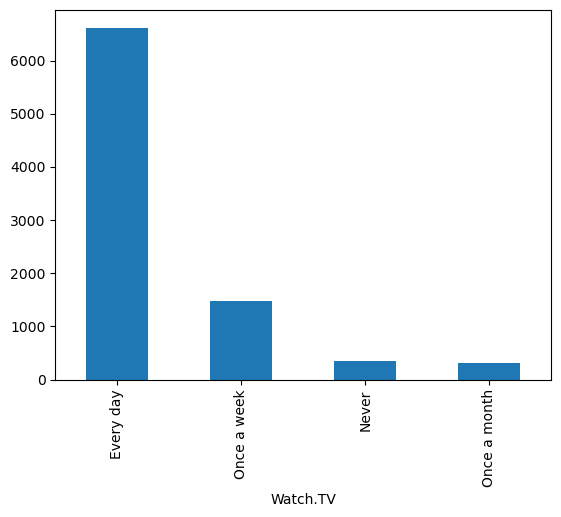

In [17]:
df_n["Watch.TV"].value_counts().plot.bar()
plt.show()

In [18]:
df_n.groupby("Watch.TV").count()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Solve.science.problems,Express.science.views,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
Watch.TV,,,,,,,,,,,,,,,,,,,,,
Every day,6621,6621,6621,6619,6453,6206,6449,6621,6272,6156,...,6444,6392,6621,6621,6621,6621,3125,3165,3113,3075
Never,348,348,348,348,340,312,336,348,319,319,...,302,299,348,348,348,348,172,182,163,163
Once a month,309,309,309,309,296,282,299,309,294,278,...,298,300,309,309,309,309,147,153,142,154
Once a week,1479,1479,1479,1479,1440,1397,1452,1479,1387,1357,...,1438,1439,1479,1479,1479,1479,725,710,703,707


In [20]:
df_n["Science.."].describe()

count    4144.000000
mean       36.313272
std        13.199105
min         0.000000
25%        27.270000
50%        34.550000
75%        43.640000
max        85.450000
Name: Science.., dtype: float64

In [43]:
data = pd.read_csv("EDA Gold Silver prices.csv")
data.head(55)

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07
5,Aug-97,162.16,11640.38
6,Sep-97,172.13,11755.57
7,Oct-97,181.57,11769.89
8,Nov-97,187.99,11370.19
9,Dec-97,224.16,11324.79


In [25]:
data.shape

(241, 3)

In [36]:
data.dtypes

Month           object
SilverPrice    float64
GoldPrice      float64
dtype: object

In [44]:
from datetime import datetime

In [52]:
data["Month"] = list(map(lambda x: datetime.strptime(x, "%m-%Y").strftime("%d-%m-%Y"), data["Month"]))

In [86]:
data.corr(numeric_only=True)

,SilverPrice,GoldPrice
SilverPrice,1.000000,0.954256
GoldPrice,0.954256,1.000000


In [59]:
data["SilverPrice"].corr(data["GoldPrice"])

0.9542559570539785

In [69]:
data_1 = data[data["Month"].str.endswith("2008")]

In [71]:
data_1["SilverPrice"].corr(data_1["GoldPrice"])

0.009583757463369353

In [72]:
curr = pd.read_csv("Currencies.csv")

In [73]:
curr.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


In [85]:
curr.corr(numeric_only=True)

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,0.815216,0.077983,0.291926,0.467693,0.320508,...,0.356889,0.296118,-0.044773,-0.069368,0.585148,0.215925,0.542852,0.291300,0.421574,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,0.259964,0.331588,-0.209926,0.469668,0.383645,...,0.382248,-0.234048,0.756618,0.277528,0.370282,-0.621466,0.257016,-0.210770,-0.047889,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-0.388099,-0.582032,0.209957,-0.627015,-0.641122,...,-0.629790,0.216936,-0.484786,0.209928,-0.458043,0.952893,-0.147436,0.210296,-0.513065,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,0.613186,0.579213,-0.042220,0.689069,0.731765,...,0.691677,-0.063891,0.439605,-0.274110,0.484703,-0.884769,0.379161,-0.042522,0.512847,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,0.822036,0.607010,0.999999,0.580842,-0.340426,...,0.596483,0.999985,-0.671798,-0.734504,0.457371,0.135467,-0.481887,0.999999,0.665831,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000,0.908465,0.822349,0.883366,0.401592,...,0.910574,0.872504,-0.157963,-0.561866,0.917543,-0.321122,0.600139,0.821881,0.601316,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,0.908465,1.000000,0.607349,0.957234,0.071958,...,0.913906,0.687806,-0.067537,-0.651600,0.769542,-0.504815,-0.677335,0.607053,0.710815,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,0.822349,0.607349,1.000000,0.581435,-0.340569,...,0.596910,0.999984,-0.671219,-0.734555,0.457699,0.135350,-0.482659,0.999999,0.666037,0.999999
Botswana Pula,0.467693,0.469668,-0.627015,0.689069,0.580842,0.883366,0.957234,0.581435,1.000000,0.220811,...,0.977147,0.671245,-0.068228,-0.707980,0.725779,-0.575553,-0.344260,0.580858,0.861270,0.581198
Brazilian Real,0.320508,0.383645,-0.641122,0.731765,-0.340426,0.401592,0.071958,-0.340569,0.220811,1.000000,...,0.249574,-0.348204,0.604634,0.172026,0.448202,-0.449111,0.935040,-0.340725,-0.001463,-0.340619


In [96]:
curr_1 = curr[["Australian Dollar", "U.S. Dollar", "Japanese Yen", "Euro", "Indian Rupee", "U.K. Pound Sterling", "Chinese Yuan"]]

In [97]:
curr_1.corr(numeric_only=True)

,Australian Dollar,U.S. Dollar,Japanese Yen,Euro,Indian Rupee,U.K. Pound Sterling,Chinese Yuan
Australian Dollar,1.000000,0.607010,-0.582032,0.331588,0.921475,0.579213,0.077983
U.S. Dollar,0.607010,1.000000,0.210295,-0.210587,0.872862,-0.042303,0.291582
Japanese Yen,-0.582032,0.210295,1.000000,-0.645719,-0.270123,-0.970308,0.117566
Euro,0.331588,-0.210587,-0.645719,1.000000,0.243851,0.531150,0.151596
Indian Rupee,0.921475,0.872862,-0.270123,0.243851,1.000000,0.314681,0.304050
U.K. Pound Sterling,0.579213,-0.042303,-0.970308,0.531150,0.314681,1.000000,0.108695
Chinese Yuan,0.077983,0.291582,0.117566,0.151596,0.304050,0.108695,1.000000


In [102]:
nas = pd.read_csv("Nas.csv")

In [111]:
edu = nas['Mother.edu'] == "Illiterate"

In [115]:
edu.mean()

0.2891716850357914

In [119]:
nas["Siblings"].value_counts()

Siblings
2 siblings      2979
1 sibling       2726
3 siblings      1526
4+ siblings     1167
Single child     403
Name: count, dtype: int64

In [122]:
sib = pd.DataFrame[(nas['Mother.edu'] == "Illiterate") and (nas["Siblings"] == "3 siblings")]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().